In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
school_type = pd.read_csv('csv_files/SchoolType.csv')
school_type_df = pd.DataFrame(school_type)
school_type_df = school_type_df[school_type_df.columns[[9, 12]]]
school_type_df.head()

,name,type
0,Blackshear Elementary School,public
1,Bryker Woods Elementary School,public
2,Casis Elementary School,public
3,Maplewood Elementary School,public
4,Mathews Elementary School,public


In [4]:
for index, row in school_type_df.iterrows():
    if "Elementary School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("Elementary School", "EL").upper()
    if "Middle School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("Middle School", "M S").upper()
    if "High School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("High School", "H S").upper()
        
school_type_df.head()

,name,type
0,BLACKSHEAR EL,public
1,BRYKER WOODS EL,public
2,CASIS EL,public
3,MAPLEWOOD EL,public
4,MATHEWS EL,public


In [5]:
def get_clean_df(path, year):
    csv = pd.read_csv(path)
    df_year = pd.DataFrame(csv)
    df_year = df_year[['CAMPUS NAME', 'TOTAL  ENROLLMENT', 'TOTAL  TITLE I  STUDENTS']]
    df_year.rename(columns={'CAMPUS NAME':'name', 'TOTAL  ENROLLMENT':f'{year} TOTAL ENROLLMENT', 'TOTAL  TITLE I  STUDENTS':f'{year} TOTAL TITLE I STUDENTS'}, inplace=True)
    return df_year

In [6]:
title_14_15_df = get_clean_df('csv_files/Travis 14-15.csv','2014-2015')
title_15_16_df = get_clean_df('csv_files/Travis 15-16.csv','2015-2016')
title_16_17_df = get_clean_df('csv_files/Travis 16-17.csv','2016-2017')
title_17_18_df = get_clean_df('csv_files/Travis 17-18.csv','2017-2018')

In [7]:
dummyone = pd.merge(title_14_15_df, title_15_16_df, how='inner', on='name')
dummytwo = pd.merge(dummyone, title_16_17_df, how='inner', on='name')
all_df = pd.merge(dummytwo, title_17_18_df, how='inner', on='name')
all_df.replace(-9999999, 2, inplace=True)
all_df['name'].count()

257

In [8]:
new_df = pd.merge(all_df, school_type_df, how='inner', on='name')
new_df['name'].count()

149

In [9]:
df = new_df[new_df.type != 'charter'].reset_index(drop=True)

df['14-16 Total Enrollment Change'] = df['2015-2016 TOTAL ENROLLMENT'] - df['2014-2015 TOTAL ENROLLMENT']
df['15-17 Total Enrollment Change'] = df['2016-2017 TOTAL ENROLLMENT'] - df['2015-2016 TOTAL ENROLLMENT']
df['16-18 Total Enrollment Change'] = df['2017-2018 TOTAL ENROLLMENT'] - df['2016-2017 TOTAL ENROLLMENT']

df['14-15 Percent Title I'] = df['2014-2015 TOTAL TITLE I STUDENTS'] / df['2014-2015 TOTAL ENROLLMENT']
df['15-16 Percent Title I'] = df['2015-2016 TOTAL TITLE I STUDENTS'] / df['2015-2016 TOTAL ENROLLMENT']
df['16-17 Percent Title I'] = df['2016-2017 TOTAL TITLE I STUDENTS'] / df['2016-2017 TOTAL ENROLLMENT']
df['17-18 Percent Title I'] = df['2017-2018 TOTAL TITLE I STUDENTS'] / df['2017-2018 TOTAL ENROLLMENT']

df['14-16 Percent Title I Change'] = (df['15-16 Percent Title I'] - df['14-15 Percent Title I']) / df['14-15 Percent Title I'] * 100
df['15-17 Percent Title I Change'] = (df['16-17 Percent Title I'] - df['15-16 Percent Title I']) / df['15-16 Percent Title I'] * 100
df['16-18 Percent Title I Change'] = (df['17-18 Percent Title I'] - df['16-17 Percent Title I']) / df['16-17 Percent Title I'] * 100

df = df[['name', 'type', '14-16 Percent Title I Change', '14-16 Total Enrollment Change', '15-17 Percent Title I Change', '15-17 Total Enrollment Change', '16-18 Percent Title I Change', '16-18 Total Enrollment Change']]
df.replace(np.inf, 100, inplace=True)
df.replace(np.nan, 0, inplace=True)
df

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change
0,AUSTIN H S,public,36.429070,-1,-35.229215,61,108.160565,122
1,LANIER H S,public,0.000000,-4,0.000000,44,0.000000,-73
2,MCCALLUM H S,public,-45.405726,90,35.208402,21,-65.423929,2
3,REAGAN H S,public,0.000000,73,0.000000,-47,0.000000,-3
4,TRAVIS H S,public,-0.077459,-38,0.077519,41,0.000000,-99
5,CROCKETT H S,public,104.924761,-36,-21.274970,53,50.013202,-49
6,ANDERSON H S,public,42.507008,46,-29.606450,-53,117.690860,5
7,BOWIE H S,public,343.664148,41,22.982416,-18,18.756313,-14
8,GARZA INDEPENDENCE H S,public,-47.222222,2,28.780488,13,-0.753093,-36
9,AKINS H S,public,284.281071,46,-31.727699,-33,47.059924,85


In [10]:
stats.linregress(x=df['14-16 Total Enrollment Change'], y=df['14-16 Percent Title I Change'])

LinregressResult(slope=-0.5644140581017904, intercept=300.4535569590198, rvalue=-0.012804776761701098, pvalue=0.8806415611123175, stderr=3.7518948715582057)

In [11]:
stats.linregress(x=df['15-17 Total Enrollment Change'], y=df['15-17 Percent Title I Change'])

LinregressResult(slope=0.47089135812605454, intercept=18.087521214365275, rvalue=0.1417424700749745, pvalue=0.09481480285453522, stderr=0.2799458730846508)

In [12]:
stats.linregress(x=df['16-18 Total Enrollment Change'], y=df['16-18 Percent Title I Change'])

LinregressResult(slope=0.21106950296593674, intercept=19.00784266915916, rvalue=0.24848635228609892, pvalue=0.0030729285109794423, stderr=0.07003961320849425)

In [13]:
ethnicity_csv = pd.read_csv('csv_files/AustinSchools.csv')
ethnicity_df = pd.DataFrame(ethnicity_csv)
ethnicity_df = ethnicity_df[['name', 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Multiracial', 'Asian', 'Native American or Native Alaskan', 'Native Hawaiian or Other Pacific Islander']]

for index, row in ethnicity_df.iterrows():
    if "Elementary School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("Elementary School", "EL").upper()
    if "Middle School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("Middle School", "M S").upper()
    if "High School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("High School", "H S").upper()
        
ethnicity_df.head()

,name,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander
0,BLACKSHEAR EL,9.97,27.84,57.39,3.09,0.69,1.03,0.00
1,BRYKER WOODS EL,68.25,1.75,20.75,5.00,4.00,0.25,0.00
2,CASIS EL,79.32,1.26,10.84,5.17,3.15,0.13,0.13
3,MAPLEWOOD EL,38.10,17.97,33.55,8.23,2.16,0.00,0.00
4,MATHEWS EL,44.00,5.18,35.76,5.65,8.94,0.24,0.24


In [14]:
final_df = pd.merge(df, ethnicity_df, how='inner', on='name')
final_df.head()

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander
0,AUSTIN H S,public,36.429070,-1,-35.229215,61,108.160565,122,45.92,4.80,44.19,2.98,1.92,0.10,0.10
1,LANIER H S,public,0.000000,-4,0.000000,44,0.000000,-73,3.34,8.73,84.71,0.80,2.17,0.25,0.00
2,MCCALLUM H S,public,-45.405726,90,35.208402,21,-65.423929,2,46.72,11.16,35.04,4.03,2.36,0.52,0.17
3,REAGAN H S,public,0.000000,73,0.000000,-47,0.000000,-3,2.92,16.21,76.96,0.84,2.92,0.15,0.00
4,TRAVIS H S,public,-0.077459,-38,0.077519,41,0.000000,-99,3.64,8.75,85.44,0.70,1.32,0.15,0.00


In [15]:
hispanic_pop = final_df[final_df['Hispanic']>=50]
hispanic_pop['14-16 Percent Title I Change'].mean()

434.97181946681667

In [16]:
white_non_h_pop = final_df[final_df['White, non-Hispanic']>=50]
white_non_h_pop['14-16 Percent Title I Change'].mean()

8.011020705769656

In [17]:
stats.ttest_ind(hispanic_pop['14-16 Percent Title I Change'], white_non_h_pop['14-16 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=1.159490863588285, pvalue=0.25007801431912696)

In [18]:
hispanic_pop['15-17 Percent Title I Change'].mean()

0.23234711366490568

In [19]:
white_non_h_pop['15-17 Percent Title I Change'].mean()

3.709496543296716

In [20]:
stats.ttest_ind(hispanic_pop['15-17 Percent Title I Change'], white_non_h_pop['15-17 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=-0.2977049115782127, pvalue=0.7672178954058883)

In [21]:
hispanic_pop['16-18 Percent Title I Change'].mean()

2.559776744167374

In [22]:
white_non_h_pop['16-18 Percent Title I Change'].mean()

30.344756479660713

In [23]:
stats.ttest_ind(hispanic_pop['16-18 Percent Title I Change'], white_non_h_pop['16-18 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=-2.490628244698352, pvalue=0.016203858986948164)

In [24]:
final_df['Major Ethnicity'] = ''
for index, row in final_df.iterrows():
    if final_df['Hispanic'][index]>=50:
        final_df['Major Ethnicity'][index] = 'Hispanic'
    elif final_df['White, non-Hispanic'][index]>=50:
        final_df['Major Ethnicity'][index] = 'White, non-Hispanic'
    else:
        final_df['Major Ethnicity'][index] = 'Other'
final_df.head()

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,Major Ethnicity
0,AUSTIN H S,public,36.429070,-1,-35.229215,61,108.160565,122,45.92,4.80,44.19,2.98,1.92,0.10,0.10,Other
1,LANIER H S,public,0.000000,-4,0.000000,44,0.000000,-73,3.34,8.73,84.71,0.80,2.17,0.25,0.00,Hispanic
2,MCCALLUM H S,public,-45.405726,90,35.208402,21,-65.423929,2,46.72,11.16,35.04,4.03,2.36,0.52,0.17,Other
3,REAGAN H S,public,0.000000,73,0.000000,-47,0.000000,-3,2.92,16.21,76.96,0.84,2.92,0.15,0.00,Hispanic
4,TRAVIS H S,public,-0.077459,-38,0.077519,41,0.000000,-99,3.64,8.75,85.44,0.70,1.32,0.15,0.00,Hispanic


Text(0.5, 1.0, 'Boxplot by Major Ethnicity')

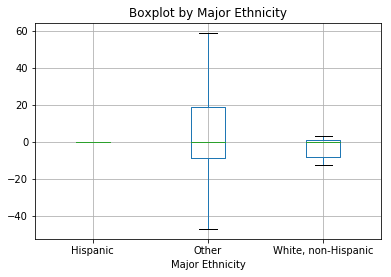

In [26]:
final_df.boxplot("14-16 Percent Title I Change", by="Major Ethnicity", showfliers=False)
plt.suptitle("")
plt.title('Boxplot by Major Ethnicity')